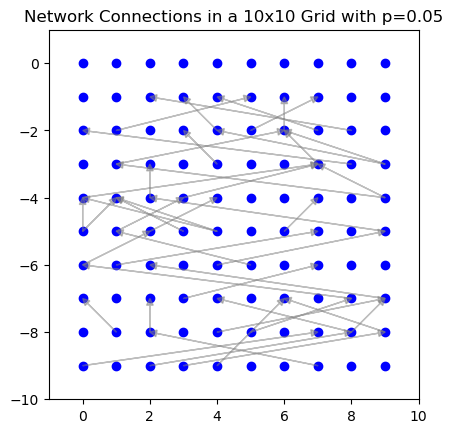

In [13]:
import numpy as np
import matplotlib.pyplot as plt

def visualize_grid_connections_directional(n, p):
    fig, ax = plt.subplots()
    # Create a grid of points
    y, x = np.meshgrid(np.arange(n), np.arange(n))
    x = x.flatten()
    y = y.flatten()
    
    # Plot all nodes
    ax.scatter(x, -y, color='blue')  # Multiply y by -1 to have row 0 at the bottom
    
    # Draw directional connections
    for i in range(n * n):
        row_from = y[i]
        col_from = x[i]
        for row_to in range(row_from):
            for col_to in range(n):
                prob = p ** (row_from - row_to)
                if np.random.rand() < prob:
                    ax.arrow(col_from, -row_from, col_to - col_from, -row_to + row_from,
                             length_includes_head=True, head_width=0.2, head_length=0.2, alpha=0.5, color='gray')
    
    ax.set_title(f"Network Connections in a {n}x{n} Grid with p={p}")
    ax.set_xlim(-1, n)
    ax.set_ylim(-n, 1)
    plt.gca().set_aspect('equal', adjustable='box')
    plt.show()

visualize_grid_connections_directional(10, 0.05)  # Example usage

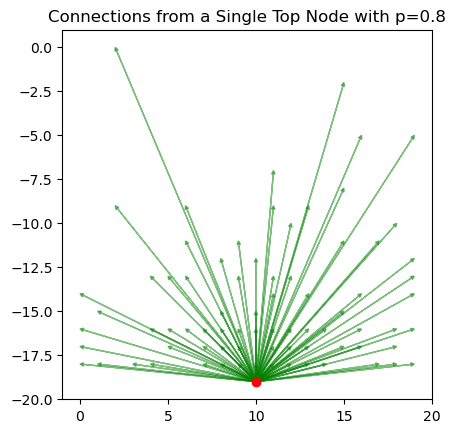

In [107]:
def visualize_single_node_connections_with_arrows(n, p):
    fig, ax = plt.subplots()
    top_node = (n-1, n//2)
    
    ax.scatter(top_node[1], -top_node[0], color='red', zorder=5)
    
    for row in range(n-1):
        for col in range(n):
            prob = p ** (n-1 - row)
            if np.random.rand() < prob:
                ax.arrow(top_node[1], -top_node[0], col - top_node[1], -row + top_node[0],
                         length_includes_head=True, head_width=0.2, head_length=0.2, alpha=0.5, color='green')
    
    ax.set_title(f"Connections from a Single Top Node with p={p}")
    ax.set_xlim(-1, n)
    ax.set_ylim(-n, 1)
    plt.gca().set_aspect('equal', adjustable='box')
    plt.show()

visualize_single_node_connections_with_arrows(20, 0.8)  # Example usage

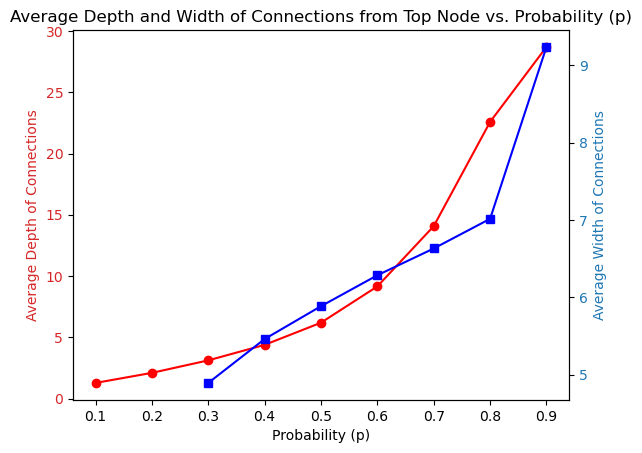

In [112]:
import numpy as np
import matplotlib.pyplot as plt

def plot_single_node_connection_statistics(n, iterations=1000):
    p_values = np.linspace(0.1, 0.9, 9)
    average_depths = []
    average_widths = []
    
    for p in p_values:
        depths = []
        widths = []
        for _ in range(iterations):
            connections_per_row = {i: 0 for i in range(n-1)}  # To track connections in each row
            max_depth = 0  # To track the furthest row reached

            # We assume the node in the top row at the middle column
            top_node_row = n - 1
            top_node_col = n // 2

            # Calculate connections
            for row in range(n-1):
                for col in range(n):
                    prob = p ** (top_node_row - row)
                    if np.random.rand() < prob:
                        connections_per_row[row] += 1
                        max_depth = max(max_depth, top_node_row - row)

            # Store the maximum depth
            depths.append(max_depth)
            
            # Calculate average width (connections per row)
            average_width = np.mean([connections_per_row[row] for row in connections_per_row if connections_per_row[row] > 0])
            widths.append(average_width)

        # Append the averages for current p
        average_depths.append(np.mean(depths))
        average_widths.append(np.mean(widths))
    
    # Plotting the results
    fig, ax1 = plt.subplots()
    ax1.set_xlabel('Probability (p)')
    ax1.set_ylabel('Average Depth of Connections', color='tab:red')
    ax1.plot(p_values, average_depths, 'o-', color='red')
    ax1.tick_params(axis='y', labelcolor='tab:red')

    ax2 = ax1.twinx()
    ax2.set_ylabel('Average Width of Connections', color='tab:blue')
    ax2.plot(p_values, average_widths, 's-', color='blue')
    ax2.tick_params(axis='y', labelcolor='tab:blue')
    
    plt.title('Average Depth and Width of Connections from Top Node vs. Probability (p)')
    plt.show()

plot_single_node_connection_statistics(30)  # Example usage


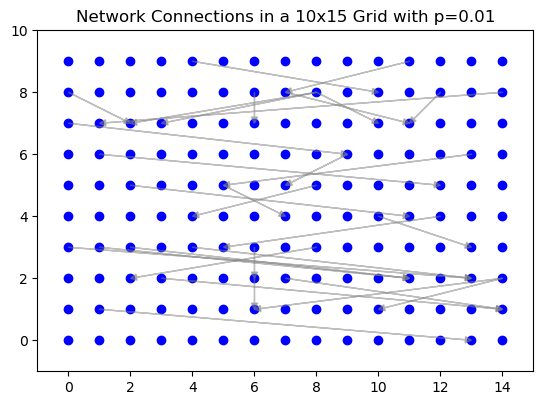

In [126]:
import numpy as np
import matplotlib.pyplot as plt

def visualize_grid_connections_directional_rectangular(n, m, p):
    fig, ax = plt.subplots()
    # Create a grid of points
    y, x = np.meshgrid(np.arange(n), np.arange(m))
    x = x.flatten()
    y = y.flatten()
    
    # Plot all nodes
    ax.scatter(x, y, color='blue')  # Removed the negative sign before y
    
    # Draw directional connections
    for i in range(n * m):
        row_from = y[i]
        col_from = x[i]
        for row_to in range(row_from):
            for col_to in range(m):
                prob = p ** (row_from - row_to)
                if np.random.rand() < prob:
                    ax.arrow(col_from, row_from, col_to - col_from, row_to - row_from,
                             length_includes_head=True, head_width=0.2, head_length=0.2, alpha=0.5, color='gray')
    
    ax.set_title(f"Network Connections in a {n}x{m} Grid with p={p}")
    ax.set_xlim(-1, m)
    ax.set_ylim(-1, n)
    plt.gca().set_aspect('equal', adjustable='box')
    plt.show()

visualize_grid_connections_directional_rectangular(10, 15, 0.01)  # Example usage


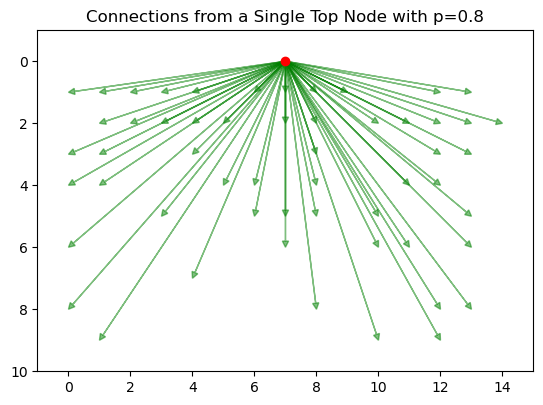

In [143]:
import numpy as np
import matplotlib.pyplot as plt

def visualize_single_node_connections_with_arrows_rectangular(n, m, p):
    fig, ax = plt.subplots()
    top_node = (0, m//2)  # Top node at the top row (row 0) and middle column

    ax.scatter(top_node[1], top_node[0], color='red', zorder=5)
    
    for row in range(1, n):  # Start iterating from the row below the top node
        for col in range(m):
            prob = p ** (row - top_node[0])
            if np.random.rand() < prob:
                # Correct the arrow drawing to start from the top and go downwards
                ax.arrow(top_node[1], top_node[0], col - top_node[1], row - top_node[0],
                         length_includes_head=True, head_width=0.2, head_length=0.2, alpha=0.5, color='green')
    
    ax.set_title(f"Connections from a Single Top Node with p={p}")
    ax.set_xlim(-1, m)
    ax.set_ylim(n, -1)  # Reverse the limits of the y-axis to display rows from top to bottom
    plt.gca().set_aspect('equal', adjustable='box')
    plt.show()

visualize_single_node_connections_with_arrows_rectangular(10, 15, 0.8)  # Example usage


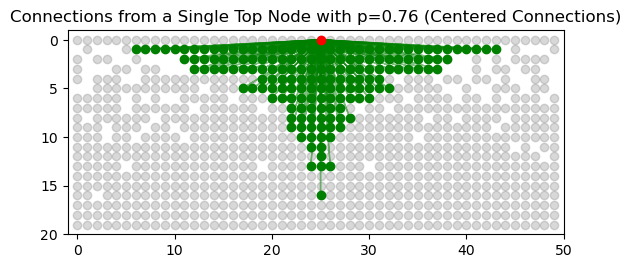

In [197]:
import numpy as np
import matplotlib.pyplot as plt

def visualize_single_node_centered_connections(n, m, p):
    fig, ax = plt.subplots()
    top_node = (0, m//2)  # Top node at the top row (row 0) and middle column

    ax.scatter(top_node[1], top_node[0], color='red', zorder=5)

    # Dictionary to hold connected nodes by row
    connections = {row: [] for row in range(n)}
    
    # Determine connections and store them
    for row in range(1, n):
        for col in range(m):
            prob = p ** (row - top_node[0])
            if np.random.rand() < prob:
                connections[row].append(col)
    
    # Now plot the nodes with connected nodes centered in each row
    for row in connections:
        if connections[row]:
            # Sort connected nodes to be near the center
            connected = np.array(connections[row])
            # Calculate the center positions for connected nodes
            start = m//2 - len(connected)//2
            centered_columns = np.arange(start, start + len(connected))
            
            # Draw arrows to connected nodes
            for col, centered_col in zip(connected, centered_columns):
                ax.arrow(top_node[1], top_node[0], centered_col - top_node[1], row - top_node[0],
                         length_includes_head=True, head_width=0.2, head_length=0.2, alpha=0.5, color='green')
                ax.scatter(centered_col, row, color='green', zorder=4)
        # Scatter unconnected nodes
        unconnected = set(range(m)) - set(connections[row])
        if unconnected:
            ax.scatter(list(unconnected), [row] * len(unconnected), color='gray', alpha=0.3)

    ax.set_title(f"Connections from a Single Top Node with p={p} (Centered Connections)")
    ax.set_xlim(-1, m)
    ax.set_ylim(n, -1)
    plt.gca().set_aspect('equal', adjustable='box')
    plt.show()

visualize_single_node_centered_connections(20, 50, 0.76)  # Example usage


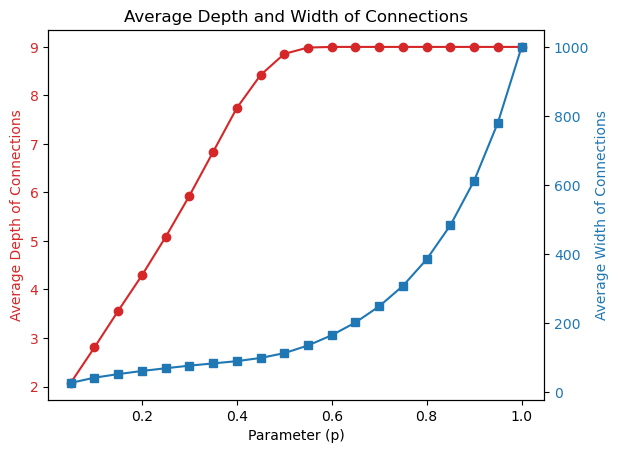

In [222]:
def plot_single_node_connection_statistics_rectangular(n, m, iterations=1000):
    p_values = np.linspace(0.05, 1, 20)
    average_depths = []
    average_widths = []
    
    for p in p_values:
        depths = []
        widths = []
        for _ in range(iterations):
            connections_per_row = {i: 0 for i in range(n-1)}  # Track connections in each row
            max_depth = 0  # Track the furthest row reached

            top_node_row = n - 1
            top_node_col = m // 2

            # Calculate connections
            for row in range(n-1):
                for col in range(m):
                    prob = p ** (top_node_row - row)
                    if np.random.rand() < prob:
                        connections_per_row[row] += 1
                        max_depth = max(max_depth, top_node_row - row)

            depths.append(max_depth)
            average_width = np.mean([connections_per_row[row] for row in connections_per_row if connections_per_row[row] > 0])
            widths.append(average_width)

        average_depths.append(np.mean(depths))
        average_widths.append(np.mean(widths))
    
    # Plotting the results
    fig, ax1 = plt.subplots()
    ax1.set_xlabel('Parameter (p)')
    ax1.set_ylabel('Average Depth of Connections', color='tab:red')
    ax1.plot(p_values, average_depths, 'o-', color='tab:red')
    ax1.tick_params(axis='y', labelcolor='tab:red')

    ax2 = ax1.twinx()
    ax2.set_ylabel('Average Width of Connections', color='tab:blue')
    ax2.plot(p_values, average_widths, 's-', color='tab:blue')
    ax2.tick_params(axis='y', labelcolor='tab:blue')
    
    plt.title('Average Depth and Width of Connections')
    plt.show()

plot_single_node_connection_statistics_rectangular(10, 1000)  # Example usage
